<a href="https://colab.research.google.com/github/YanaSalova/PythonTasks/blob/main/MultyNormalDistrubution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

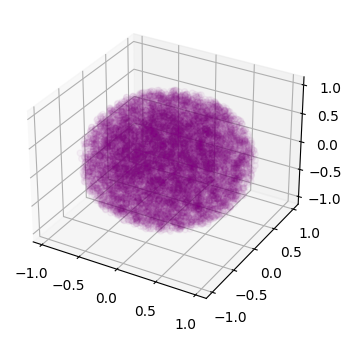

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
import random
import numpy as np

dim = 3

def MultivariateNormalDistribution(n = dim, mean = np.zeros(dim), cov = np.identity(dim)):

    # Проверяем размерности входных параметров
    assert cov.shape == (n, n)
    assert mean.shape == (n,)

    # Вычисляем матрицу разложения Холецкого для матрицы ковариаций
    A = np.linalg.cholesky(cov)

    # Генерируем n случайных значений из стандартного нормального распределения
    # и умножаем на матрицу A
    # Затем прибавляем вектор средних значений
    return A @ np.random.normal(0, 1, n) + mean


def sphere():
    # Создаем пустой массив для хранения векторов выборки
    sample = np.empty((0, dim))
    # Генерируем 10000 случайных векторов
    for i in range(10000):
        # Генерируем случайный вектор из n-мерного нормального распределения
        vector = np.random.normal(0,1,3)

        vector = vector / np.linalg.norm(vector) * pow(random.uniform(0, 1), 1/dim)
        # Добавляем вектор в массив ( используем квадратные скобки, чтобы создать список из одного элемента, потому что np.append() ожидает второй аргумент в виде массива или списка)
        sample = np.append(sample, [vector], axis = 0)

    ax.scatter(sample[:,0], sample[:,1], sample[:,2], alpha = 0.04, color = "purple")
    #ax.scatter(sample[:,0], sample[:,1], color='red', alpha=0.04)

    plt.show()

sphere()




In [ ]:
import numpy as np

# Задаем истинную ковариационную матрицу
cov_true = np.array([[1,1,0],
                     [1,2,0],
                     [0,0,3]])
Cov_true = np.linalg.cholesky(cov_true)

# Генерируем выборки разных размеров
n_samples = [10, 100, 1000, 10000,  100000, 1000000]
for n in n_samples:
    # Генерируем случайную выборку
    X = []
    for i in range(n):
      X.append(np.random.normal(0,1,3))

    X = np.array(X)
    Y = Cov_true @ X.T

    # Вычисляем выборочную ковариационную матрицу
    cov_sample = np.cov(Y)

    # Выводим результаты
    print(f"Sample size: {n}")
    #print(f"True covariance:\n{cov_true}")
    #print(f"Estimated covariance:\n{cov_sample}")
    print(f"Absolute error:\n{np.abs(Cov_true - cov_sample)}\n")

Sample size: 10
Absolute error:
[[0.00436356 1.14125196 0.84391593]
 [0.14125196 1.78840276 1.67907835]
 [0.84391593 1.67907835 0.24227019]]

Sample size: 100
Absolute error:
[[0.10333537 0.91210566 0.28963596]
 [0.08789434 0.97140133 0.40669687]
 [0.28963596 0.40669687 1.15586354]]

Sample size: 1000
Absolute error:
[[0.03399842 0.99476812 0.0521197 ]
 [0.00523188 0.98593592 0.01766695]
 [0.0521197  0.01766695 1.24452504]]

Sample size: 10000
Absolute error:
[[0.0244134  0.97884035 0.00329922]
 [0.02115965 0.99894351 0.02551213]
 [0.00329922 0.02551213 1.19893916]]

Sample size: 100000
Absolute error:
[[2.18685859e-03 1.00472284e+00 1.53091217e-04]
 [4.72284031e-03 1.01254265e+00 2.31738386e-03]
 [1.53091217e-04 2.31738386e-03 1.24217447e+00]]

Sample size: 1000000
Absolute error:
[[8.23542615e-05 1.00045152e+00 8.94259014e-04]
 [4.51518275e-04 1.00332968e+00 5.54842839e-03]
 [8.94259014e-04 5.54842839e-03 1.26494487e+00]]



In [ ]:
import numpy as np

X = np.random.randn(50, 3)

G = np.dot(X.T, X)

Cov = np.cov(X, rowvar=False)

print("Матрица Грама:\n", G)
print("Ковариационная матрица:\n", Cov)



Матрица Грама:
 [[ 55.03316915  11.21409177 -14.23119956]
 [ 11.21409177  46.76516903  -6.34305024]
 [-14.23119956  -6.34305024  52.92225434]]
Ковариационная матрица:
 [[ 1.12257542  0.23018416 -0.29082124]
 [ 0.23018416  0.95120126 -0.12851457]
 [-0.29082124 -0.12851457  1.07977169]]


In [ ]:
sample = np.array([MultivariateNormalDistribution(3, np.zeros(3), cov_true) for i in range(10)])

In [ ]:
print(sample)

[[-2.29273339 -2.78595305  0.17582433]
 [-0.87953186  0.18222598 -1.03130377]
 [-1.05192234 -2.24969003 -1.49443839]
 [-2.11226919 -3.02069835 -2.07350803]
 [ 0.86372736  1.44508573  0.78190488]
 [-0.14239787 -0.10558528  1.58045891]
 [-0.04144081 -1.03359024 -3.14965233]
 [ 0.22492946  0.82045601  0.56058427]
 [ 2.29250394  1.79359987  1.87183402]
 [ 1.46083638  0.54468921  2.64986569]]
